## Why re-scale data (fpl)? 

In this notebook, we'll use **Kmeans clustering** to demonstrate the importance of scaling data

**K-means clustering** is an unsupervised machine learning algorithm used for partitioning a dataset into K distinct, non-overlapping clusters. The goal of K-means is to minimize the sum of squared distances between data points and their respective cluster centroids.

Here's how the K-means algorithm works:

1. Pick K random objects as the initial cluster centers.
2. Classify each object into the cluster whose center is closest to the point.
3. For each cluster of classified objects, compute the centroid (mean).
4. Now reclassify each object using the centroids as cluster centers.
5. Calculate the total variance of the clusters (this is the measure of goodness).
6. Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance.

Here's a video showing the above steps: https://www.youtube.com/watch?v=4b5d3muPQmA

First, let's import the necessary libraries and load the Iris dataset:

In [ ]:
from dataidea.packages import pd, plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from dataidea.datasets import loadDataset

In [ ]:
fpl_data = loadDataset('fpl')

We can be able to load it like this because it inbuilt in the dataidea package

Now let's pick out a few numeric columns that we might consider moving forward

In [ ]:
fpl_sample = fpl_data[['Goals_Scored', 'Assists','Total_Points', 
                       'Minutes', 'Saves', 'Goals_Conceded', 
                       'Creativity', 'Influence'
                      ]]

In [ ]:
fpl_sample.head()

,Goals_Scored,Assists,Total_Points,Minutes,Saves,Goals_Conceded,Creativity,Influence
0,18,14,244,3101,0,36,1414.9,1292.6
1,23,14,242,3083,0,39,659.1,1318.2
2,22,6,231,3077,0,41,825.7,1056.0
3,17,11,228,3119,0,36,1049.9,1052.2
4,17,11,194,3052,0,50,371.0,867.2


## Clustering without Scaling

Next, let's perform K-means clustering on the original dataset without scaling the features:

In [ ]:
# Apply K-means clustering without scaling
kmeans_unscaled = KMeans(n_clusters=4, random_state=42)
kmeans_unscaled.fit(fpl_sample)

# Get the cluster centers and labels
centroids_unscaled = kmeans_unscaled.cluster_centers_
labels_unscaled = kmeans_unscaled.labels_

Let's see the performance

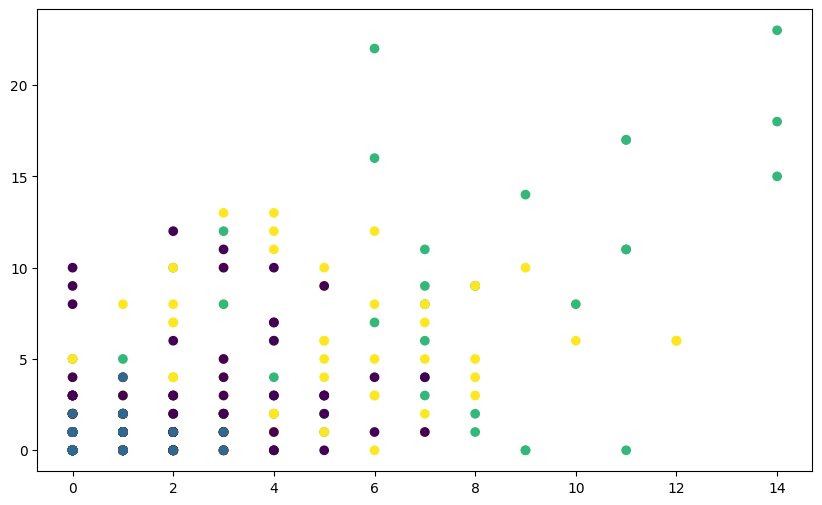

In [ ]:
# Visualize clusters without scaling
plt.figure(figsize=(10, 6))

plt.scatter(fpl_sample.Assists, fpl_sample.Goals_Scored, c=labels_unscaled, cmap='viridis',)

plt.show()

You'll notice that the clusters may not seem well-separated or meaningful. This is because the features of the Iris dataset have different scales, 

## Clustering after Scaling

Now, let's repeat the process after scaling the features using StandardScaler:

In [ ]:
# Scale the features
scaler = StandardScaler()
fpl_sample_scaled = scaler.fit_transform(fpl_sample)

# Transform scaled features back to DataFrame
fpl_sample_scaled_dataframe = pd.DataFrame(fpl_sample_scaled, columns=fpl_sample.columns)

# Apply K-means clustering on scaled features
kmeans_scaled = KMeans(n_clusters=4, random_state=42)
kmeans_scaled.fit(fpl_sample_scaled)

# Get the cluster centers and labels
centroids_scaled = kmeans_scaled.cluster_centers_
labels_scaled = kmeans_scaled.labels_

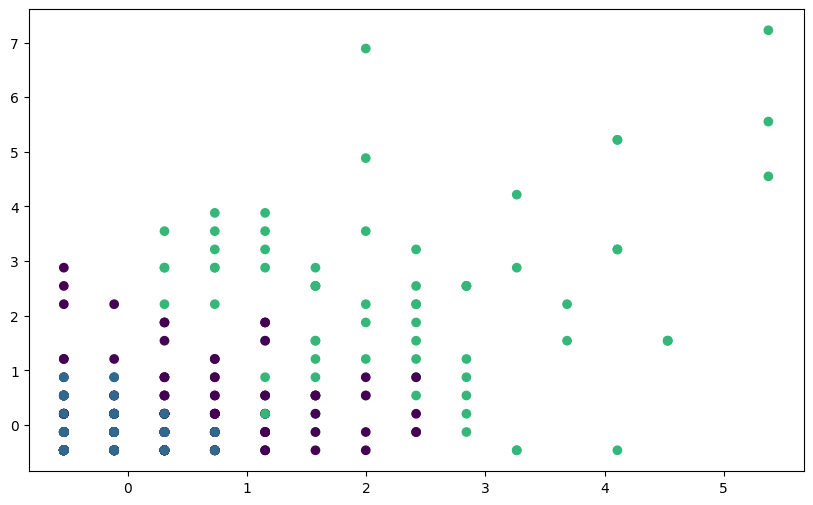

In [ ]:
# Visualize clusters without scaling
plt.figure(figsize=(10, 6))

plt.scatter(fpl_sample_scaled_dataframe.Assists, 
            fpl_sample_scaled_dataframe.Goals_Scored, 
            c=labels_scaled, cmap='viridis')

plt.show()

You should see clearer and more meaningful clusters after scaling the features, demonstrating the importance of feature scaling for K-means clustering, especially when dealing with datasets with features of different scales.

## Take away

If the data doesn't follow a standard scale, meaning the features have different scales or variances, it can lead to some issues when applying K-means clustering:

1. **Unequal feature influence**: Features with larger scales or variances can dominate the clustering process. Since K-means relies on Euclidean distance, features with larger scales will contribute more to the distance calculation, potentially biasing the clustering results towards those features.

2. **Incorrect cluster shapes**: K-means assumes that clusters are isotropic (spherical) and have similar variances along all dimensions. If the data has features with different scales, clusters may be stretched along certain dimensions, leading to suboptimal cluster assignments.

3. **Convergence speed**: Features with larger scales can cause centroids to move more quickly towards areas with denser data, potentially affecting the convergence speed of the algorithm.

By scaling the data before clustering, you ensure that each feature contributes equally to the distance calculations, helping to mitigate the issues associated with different feature scales. This can lead to more accurate and reliable clustering results.